# Seam carving
- we can save the original feature of image and also reduced the size.italicized text

Seam carving (or liquid rescaling) is an algorithm for content-aware image resizing. 

It functions by establishing a number of seams (paths of least importance) in an image and automatically removes seams to reduce image size or inserts seams to extend it. Seam carving also allows manually defining areas in which pixels may not be modified, and features the ability to remove whole objects from photographs.

The purpose of the algorithm is image retargeting, which is the problem of displaying images without distortion on media of various sizes (cell phones, projection screens) using document standards, like HTML, that already support dynamic changes in page layout and text but not images.

Step


1) Start with an image.	

2) Calculate the weight/density/energy of each pixel. This can be done by various algorithms: gradient magnitude.	We can find gradient using sobel filter.

3) From the energy, make a list of seams. Seams are ranked by energy, with low energy seams being of least importance to the content of the image. Seams can be calculated via the dynamic programming approach below.	

4) Remove low-energy seams as needed.	

5) Final image.

In [1]:
from skimage import transform
from skimage import filters
import cv2
from matplotlib import pyplot as plt

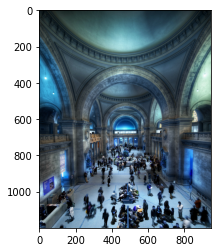

In [2]:
img = cv2.imread('/content/seam.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

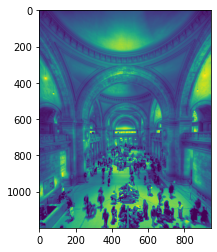

In [3]:
plt.imshow(gray)

In [18]:
!pip uninstall scikit-image 0.15.0

Found existing installation: scikit-image 0.16.2
Uninstalling scikit-image-0.16.2:
  Would remove:
    /usr/local/bin/skivi
    /usr/local/lib/python3.7/dist-packages/scikit_image-0.16.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/skimage/*
Proceed (y/n)? y
  Successfully uninstalled scikit-image-0.16.2


In [22]:
!pip install scikit-image version 0.15.0

  Using cached scikit_image-0.18.2-cp37-cp37m-manylinux1_x86_64.whl (29.2 MB)
  Using cached version-0.1.1.tar.gz (2.0 kB)
  Using cached version-0.1.0.tar.gz (1.9 kB)
ERROR: Could not find a version that satisfies the requirement 0.15.0 (from versions: none)
ERROR: No matching distribution found for 0.15.0


In [27]:
for i in range(20, 180, 20):
    carved_image = transform.seam_carve(img,
                                        filtered, 
                                        'horizontal',
                                        i)

AttributeError: ignored

In [25]:
!pip install pulp

     |████████████████████████████████| 40.6 MB 34 kB/s 


In [26]:
import pulp

def find_vertical_seam(energy):
    N, M = energy.shape
    prob = pulp.LpProblem("Seam carving", pulp.LpMinimize)

    x = pulp.LpVariable.dicts("pixels",(list(range(N)),list(range(M))),0,1,pulp.LpInteger)

    objective_terms = list()
    for i in range(N):
        for j in range(M):
            objective_terms.append(energy[i][j] * x[i][j])
    prob += pulp.lpSum(objective_terms) # adds up all the terms in the list

    for i in range(N):
        prob += pulp.lpSum(x[i][j] for j in range(M)) == 1

    for i in range(N-1):
        for j in range(M): # below: this says: x(i,j) - x(i+1,j-1) - x(i+1,j) - x(i+1,j+1) <= 0
            prob += pulp.lpSum([x[i][j]]+[-x[i+1][k] for k in range(max(0,j-1),min(M,j+2))]) <= 0

    # Solve the problem
    prob.solve()

    seam = []
    for i in range(N):
        for j in range(M):
            if pulp.value(x[i][j]) == 1.0:
                seam.append(j)        
    return seam